# Modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Variables

In [4]:
# National emissions reported to the Convention on Long-range Transboundary Air Pollution (LRTAP Convention), 2023
# https://sdi.eea.europa.eu/catalogue/srv/eng/catalog.search#/metadata/2999364f-be52-4012-b4fd-f98e2cc8fab6
ds_NatEmissions='01.Data/eea_t_lrtap-convention_p_1990-2021_v01_r00/CLRTAP_NVFR19_V23_1_GF_csv.csv'

In [5]:
# National emissions reported to the UNFCCC and to the EU Greenhouse Gas Monitoring Mechanism, October 2023
# https://sdi.eea.europa.eu/catalogue/srv/eng/catalog.search#/metadata/e2e7dd1e-0d67-4b20-a0d4-b22c53a59d24
ds_UNFCCEmissions='01.Data/eea_t_national-emissions-reported_p_2023_v01_r01/UNFCCC_v26.csv'

# Load data

In [6]:
df_NatEmissions=pd.read_csv(ds_NatEmissions,header=0,delimiter="\t", dtype='unicode')

In [7]:
df_NatEmissions.head()

,Country_Code,Country,Pollutant_name,Format_name,Sector_code,Year,Emissions,Unit,Notation,VersionId,Parent_sector_code,Sector_name
0,AT,Austria,As,NFR 2014-1,1A1a,1990,NaN,Mg,NaN,1,NATIONAL TOTAL,Public electricity and heat production
1,AT,Austria,As,NFR 2014-1,1A1b,1990,NaN,Mg,NaN,1,NATIONAL TOTAL,Petroleum refining
2,AT,Austria,As,NFR 2014-1,1A1c,1990,NaN,Mg,NaN,1,NATIONAL TOTAL,Manufacture of solid fuels and other energy in...
3,AT,Austria,As,NFR 2014-1,1A2a,1990,NaN,Mg,NaN,1,NATIONAL TOTAL,Stationary combustion in manufacturing industr...
4,AT,Austria,As,NFR 2014-1,1A2b,1990,NaN,Mg,NaN,1,NATIONAL TOTAL,Stationary combustion in manufacturing industr...


Let's filter only emissions from domestic and international aviation.

In [8]:
col=df_NatEmissions.Sector_name.unique()
for i in col: 
    if type(i) is str:
        if 'aviation' in i:
            print(i)

International aviation LTO (civil)
Domestic aviation LTO (civil)
International aviation cruise (civil)
Domestic aviation cruise (civil)


In [9]:
df_NatEmissions = df_NatEmissions[
    (df_NatEmissions.Sector_name == 'International aviation LTO (civil)') |
    (df_NatEmissions.Sector_name == 'Domestic aviation LTO (civil)') |
    (df_NatEmissions.Sector_name == 'International aviation cruise (civil)') |
    (df_NatEmissions.Sector_name == 'Domestic aviation cruise (civil)')]
df_NatEmissions.Sector_name.unique()

array(['International aviation LTO (civil)',
       'Domestic aviation LTO (civil)',
       'International aviation cruise (civil)',
       'Domestic aviation cruise (civil)'], dtype=object)

In [10]:
df_NatEmissions.shape

(109824, 12)

In [11]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))

In [12]:
print_categories(df_NatEmissions)

Country_Code :  Categorical
Country :  Categorical
Pollutant_name :  Categorical
Format_name :  Categorical
Sector_code :  Categorical
Year :  Categorical
Emissions :  Categorical
Unit :  Categorical
Notation :  Categorical
VersionId :  Categorical
Parent_sector_code :  Categorical
Sector_name :  Categorical


In [13]:
df_NatEmissions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109824 entries, 11 to 3816372
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Country_Code        109824 non-null  object
 1   Country             109824 non-null  object
 2   Pollutant_name      109824 non-null  object
 3   Format_name         109824 non-null  object
 4   Sector_code         109824 non-null  object
 5   Year                109824 non-null  object
 6   Emissions           65639 non-null   object
 7   Unit                109824 non-null  object
 8   Notation            0 non-null       object
 9   VersionId           109824 non-null  object
 10  Parent_sector_code  55744 non-null   object
 11  Sector_name         109824 non-null  object
dtypes: object(12)
memory usage: 10.9+ MB


We can see that the column `Emissions` have some null values, let focus this point.

In [14]:
df_NatEmissions['Emissions'] = df_NatEmissions['Emissions'].astype("float")

In [15]:
df_NatEmissions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109824 entries, 11 to 3816372
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country_Code        109824 non-null  object 
 1   Country             109824 non-null  object 
 2   Pollutant_name      109824 non-null  object 
 3   Format_name         109824 non-null  object 
 4   Sector_code         109824 non-null  object 
 5   Year                109824 non-null  object 
 6   Emissions           65639 non-null   float64
 7   Unit                109824 non-null  object 
 8   Notation            0 non-null       object 
 9   VersionId           109824 non-null  object 
 10  Parent_sector_code  55744 non-null   object 
 11  Sector_name         109824 non-null  object 
dtypes: float64(1), object(11)
memory usage: 10.9+ MB


In [16]:
df_NatEmissions.Pollutant_name.unique()

array(['As', 'BC', 'benzo(a)', 'benzo(b)', 'benzo(k)', 'Cd', 'CO', 'Cr',
       'Cu', 'dioxin', 'HCB', 'Hg', 'Indeno', 'NH3', 'Ni', 'NMVOC', 'NOx',
       'Pb', 'PCB', 'PM10', 'PM2.5', 'Se', 'SOx', 'total PAH', 'TSP',
       'Zn'], dtype=object)

In [17]:
# Filter
df_NatEmissions_CO = df_NatEmissions[df_NatEmissions.Pollutant_name == 'CO']
df_NatEmissions_CO.head()

,Country_Code,Country,Pollutant_name,Format_name,Sector_code,Year,Emissions,Unit,Notation,VersionId,Parent_sector_code,Sector_name
880715,AT,Austria,CO,NFR 2014-1,1A3ai(i),1990,0.546015,Gg,NaN,1,NATIONAL TOTAL,International aviation LTO (civil)
880716,AT,Austria,CO,NFR 2014-1,1A3aii(i),1990,2.011739,Gg,NaN,1,NATIONAL TOTAL,Domestic aviation LTO (civil)
880834,AT,Austria,CO,NFR 2014-1,1A3ai(ii),1990,0.371429,Gg,NaN,1,NaN,International aviation cruise (civil)
880835,AT,Austria,CO,NFR 2014-1,1A3aii(ii),1990,0.029021,Gg,NaN,1,NaN,Domestic aviation cruise (civil)
880854,BE,Belgium,CO,NFR 2014-1,1A3ai(i),1990,0.682209,Gg,NaN,1,NATIONAL TOTAL,International aviation LTO (civil)


In [18]:
# Select only useful columns
df_NatEmissions_CO=df_NatEmissions_CO[['Country_Code','Pollutant_name','Year','Emissions','Unit','Sector_name']]
df_NatEmissions_CO.head()

,Country_Code,Pollutant_name,Year,Emissions,Unit,Sector_name
880715,AT,CO,1990,0.546015,Gg,International aviation LTO (civil)
880716,AT,CO,1990,2.011739,Gg,Domestic aviation LTO (civil)
880834,AT,CO,1990,0.371429,Gg,International aviation cruise (civil)
880835,AT,CO,1990,0.029021,Gg,Domestic aviation cruise (civil)
880854,BE,CO,1990,0.682209,Gg,International aviation LTO (civil)


In [19]:
# Show null values per each column
df_NatEmissions_CO.isna().sum()

Country_Code        0
Pollutant_name      0
Year                0
Emissions         334
Unit                0
Sector_name         0
dtype: int64

In [20]:
# These Country has some missiong values on Emissions column
df_NatEmissions_CO_remove=df_NatEmissions_CO[df_NatEmissions_CO.Emissions.isnull()].Country_Code.unique()

In [21]:
df_NatEmissions_CO=df_NatEmissions_CO[~df_NatEmissions_CO.Country_Code.isin(df_NatEmissions_CO_remove)]

In [22]:
df_NatEmissions_CO.isna().sum()

Country_Code      0
Pollutant_name    0
Year              0
Emissions         0
Unit              0
Sector_name       0
dtype: int64

In [23]:
df_NatEmissions_CO.head()

,Country_Code,Pollutant_name,Year,Emissions,Unit,Sector_name
880715,AT,CO,1990,0.546015,Gg,International aviation LTO (civil)
880716,AT,CO,1990,2.011739,Gg,Domestic aviation LTO (civil)
880834,AT,CO,1990,0.371429,Gg,International aviation cruise (civil)
880835,AT,CO,1990,0.029021,Gg,Domestic aviation cruise (civil)
880854,BE,CO,1990,0.682209,Gg,International aviation LTO (civil)


In [24]:
df_NatEmissions_CO.groupby(['Sector_name'])['Sector_name'].count()

Sector_name
Domestic aviation LTO (civil)            800
Domestic aviation cruise (civil)         800
International aviation LTO (civil)       800
International aviation cruise (civil)    800
Name: Sector_name, dtype: int64

In [25]:
df_NatEmissions_CO.groupby(['Unit'])['Unit'].count()

Unit
Gg    3200
Name: Unit, dtype: int64

In [26]:
df_NatEmissions_CO.groupby(['Sector_name','Year'])['Year'].count()

Sector_name                            Year
Domestic aviation LTO (civil)          1990    25
                                       1991    25
                                       1992    25
                                       1993    25
                                       1994    25
                                               ..
International aviation cruise (civil)  2017    25
                                       2018    25
                                       2019    25
                                       2020    25
                                       2021    25
Name: Year, Length: 128, dtype: int64

In [50]:
df_NatEmissions_CO_YEAR=df_NatEmissions_CO.groupby('Year')['Emissions'].sum()
# Convert pd Series to pd Dataframe (https://stackoverflow.com/a/26098292/1008588)
df_NatEmissions_CO_YEAR=pd.DataFrame({'Year':df_NatEmissions_CO_YEAR.index, 'Emissions':df_NatEmissions_CO_YEAR.values})
df_NatEmissions_CO_YEAR.head()

,Year,Emissions
0,1990,1026.811317
1,1991,910.017473
2,1992,1040.116068
3,1993,1245.810481
4,1994,1075.720078


In [53]:
df_NatEmissions_CO_YEAR['rolling_emissions'] = df_NatEmissions_CO_YEAR.Emissions.rolling(5).mean()

In [54]:
df_NatEmissions_CO_YEAR.head()

,Year,Emissions,rolling_emissions
0,1990,1026.811317,NaN
1,1991,910.017473,NaN
2,1992,1040.116068,NaN
3,1993,1245.810481,NaN
4,1994,1075.720078,1059.695083


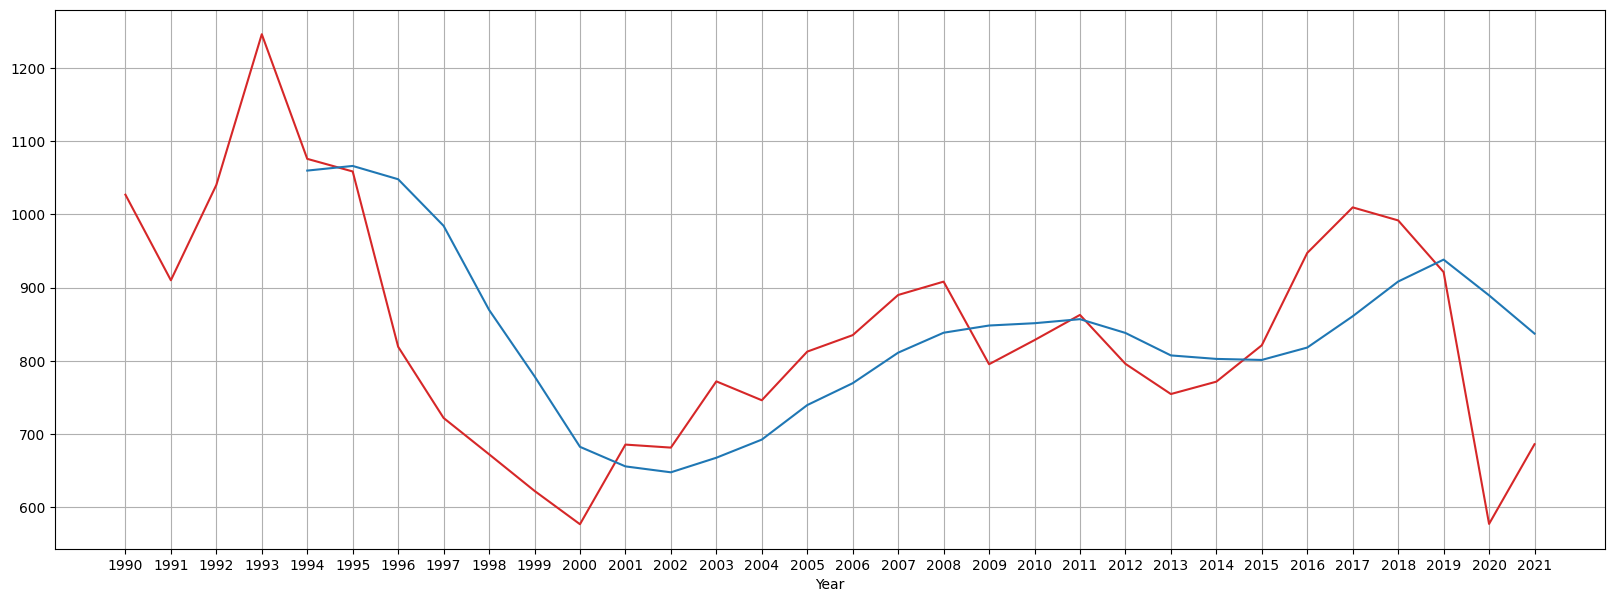

In [59]:
fig, ax1 = plt.subplots(figsize=(20,7))
color = 'tab:red'

ax1.set_xlabel('Year')
#ax1.set_ylabel('CO2 Emissions', color=color)
ax1.plot(df_NatEmissions_CO_YEAR['Year'], df_NatEmissions_CO_YEAR['Emissions'],color=color) 
plt.grid()

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
#ax2.set_ylabel('CO2 Emissions moving mean', color=color)
ax1.plot(df_NatEmissions_CO_YEAR['Year'], df_NatEmissions_CO_YEAR['rolling_emissions'],color=color) 
#ax2.tick_params(axis='y', labelcolor=color)


plt.show() 

In [ ]:
df_NatEmissions1 = df_NatEmissions[df_NatEmissions.Pollutant_name == 'CO']

In [ ]:
#AND
df_NatEmissions2=df_NatEmissions[(df_NatEmissions.Pollutant_name == 'CO') & (df_NatEmissions.Sector_name == 'International aviation LTO (civil)')]
#OR
df_NatEmissions3=df_NatEmissions[(df_NatEmissions.Pollutant_name == 'CO') | (df_NatEmissions.Sector_name == 'International aviation LTO (civil)')]

In [ ]:
#df_NatEmissions3.Pollutant_name.unique()
df_NatEmissions3.Sector_name.unique()

array(['International aviation LTO (civil)',
       'Domestic aviation LTO (civil)',
       'International aviation cruise (civil)',
       'Domestic aviation cruise (civil)'], dtype=object)

In [ ]:
input_data=pd.read_csv(ds_UNFCCEmissions,header=0, dtype='unicode')

In [ ]:
input_data.head()

,Country_code,Country,Format_name,Pollutant_name,Sector_code,Sector_name,Parent_sector_code,Unit,Year,emissions,Notation,PublicationDate,DataSource
0,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),-,- 4(IV) Indirect N2O Emissions from Managed S...,4,Gg CO2 equivalent,1994,12.62568,NaN,20231006,EEA
1,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),-,- 4(IV) Indirect N2O Emissions from Managed S...,4,Gg CO2 equivalent,1999,11.86116,NaN,20231006,EEA
2,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),-,- 4(IV) Indirect N2O Emissions from Managed S...,4,Gg CO2 equivalent,2010,12.66384,NaN,20231006,EEA
3,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),-,- 4(IV) Indirect N2O Emissions from Managed S...,4,Gg CO2 equivalent,2011,12.59482,NaN,20231006,EEA
4,AT,Austria,IPCC Common Reporting Format,All greenhouse gases - (CO2 equivalent),1,1 - Energy,Sectors/Totals_incl_incl,Gg CO2 equivalent,1993,52087.32124,NaN,20231006,EEA


In [ ]:
input_data.size

8726068